In [1]:
import pandas as pd
import numpy as np

# Load datasets (update names if different)
adult_path = '../data/raw/autism_screening.csv'
child_path = '../data/raw/Autism-Child-Data.csv'

df_adult = pd.read_csv(adult_path)
df_child = pd.read_csv(child_path)

# Add a dataset identifier
df_adult['dataset_type'] = 'adult'
df_child['dataset_type'] = 'child'

# Standardize column names
df_adult.columns = df_adult.columns.str.strip().str.lower().str.replace(' ', '_')
df_child.columns = df_child.columns.str.strip().str.lower().str.replace(' ', '_')

df_adult.head(), df_child.head()


(   a1_score  a2_score  a3_score  a4_score  a5_score  a6_score  a7_score  \
 0         1         1         1         1         0         0         1   
 1         1         1         0         1         0         0         0   
 2         1         1         0         1         1         0         1   
 3         1         1         0         1         0         0         1   
 4         1         0         0         0         0         0         0   
 
    a8_score  a9_score  a10_score  ...       ethnicity jundice austim  \
 0         1         0          0  ...  White-European      no     no   
 1         1         0          1  ...          Latino      no    yes   
 2         1         1          1  ...          Latino     yes    yes   
 3         1         0          1  ...  White-European      no    yes   
 4         1         0          0  ...               ?      no     no   
 
    contry_of_res used_app_before result     age_desc  relation class/asd  \
 0  United States        

In [2]:
#CHECKING FOR COLUMN DIFFERENCES 
set(df_adult.columns), set(df_child.columns)


({'a10_score',
  'a1_score',
  'a2_score',
  'a3_score',
  'a4_score',
  'a5_score',
  'a6_score',
  'a7_score',
  'a8_score',
  'a9_score',
  'age',
  'age_desc',
  'austim',
  'class/asd',
  'contry_of_res',
  'dataset_type',
  'ethnicity',
  'gender',
  'jundice',
  'relation',
  'result',
  'used_app_before'},
 {'a10_score',
  'a1_score',
  'a2_score',
  'a3_score',
  'a4_score',
  'a5_score',
  'a6_score',
  'a7_score',
  'a8_score',
  'a9_score',
  'age',
  'age_desc',
  'austim',
  'class/asd',
  'contry_of_res',
  'dataset_type',
  'ethnicity',
  'gender',
  'id',
  'jundice',
  'relation',
  'result',
  'used_app_before'})

In [3]:
# ALIGNING THE COLUMNS
# Find common columns
common_cols = list(set(df_adult.columns).intersection(set(df_child.columns)))
common_cols


['austim',
 'a4_score',
 'a3_score',
 'contry_of_res',
 'relation',
 'used_app_before',
 'age_desc',
 'a1_score',
 'gender',
 'a2_score',
 'age',
 'a5_score',
 'jundice',
 'dataset_type',
 'a6_score',
 'a7_score',
 'a10_score',
 'ethnicity',
 'a8_score',
 'class/asd',
 'result',
 'a9_score']

In [4]:
#ADDING 
df_adult = df_adult.reindex(columns=common_cols)
df_child = df_child.reindex(columns=common_cols)


In [5]:
#COMBINING BOTH DATASETS
df = pd.concat([df_adult, df_child], ignore_index=True)
df.head()


,austim,a4_score,a3_score,contry_of_res,relation,used_app_before,age_desc,a1_score,gender,a2_score,...,jundice,dataset_type,a6_score,a7_score,a10_score,ethnicity,a8_score,class/asd,result,a9_score
0,no,1,1,United States,Self,no,18 and more,1,f,1,...,no,adult,0,1,0,White-European,1,NO,6.0,0
1,yes,1,0,Brazil,Self,no,18 and more,1,m,1,...,no,adult,0,0,1,Latino,1,NO,5.0,0
2,yes,1,0,Spain,Parent,no,18 and more,1,m,1,...,yes,adult,0,1,1,Latino,1,YES,8.0,1
3,yes,1,0,United States,Self,no,18 and more,1,f,1,...,no,adult,0,1,1,White-European,1,NO,6.0,0
4,no,0,0,Egypt,?,no,18 and more,1,f,0,...,no,adult,0,0,0,?,1,NO,2.0,0


In [6]:
#SAVING THE COMBINED DATASET
df.to_csv('../data/processed/autism_combined.csv', index=False)


In [8]:
#IMPORT LIBRARIES AND LOAD THE COMBINED DATASET 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# Load combined dataset
df = pd.read_csv('../data/processed/autism_combined.csv')
df.head()


,austim,a4_score,a3_score,contry_of_res,relation,used_app_before,age_desc,a1_score,gender,a2_score,...,jundice,dataset_type,a6_score,a7_score,a10_score,ethnicity,a8_score,class/asd,result,a9_score
0,no,1,1,United States,Self,no,18 and more,1,f,1,...,no,adult,0,1,0,White-European,1,NO,6.0,0
1,yes,1,0,Brazil,Self,no,18 and more,1,m,1,...,no,adult,0,0,1,Latino,1,NO,5.0,0
2,yes,1,0,Spain,Parent,no,18 and more,1,m,1,...,yes,adult,0,1,1,Latino,1,YES,8.0,1
3,yes,1,0,United States,Self,no,18 and more,1,f,1,...,no,adult,0,1,1,White-European,1,NO,6.0,0
4,no,0,0,Egypt,?,no,18 and more,1,f,0,...,no,adult,0,0,0,?,1,NO,2.0,0


In [9]:
#CHECKING BASIC INFO, SHAPE, Dtypes
df.info()
df.shape
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   austim           996 non-null    object 
 1   a4_score         996 non-null    int64  
 2   a3_score         996 non-null    int64  
 3   contry_of_res    996 non-null    object 
 4   relation         996 non-null    object 
 5   used_app_before  996 non-null    object 
 6   age_desc         996 non-null    object 
 7   a1_score         996 non-null    int64  
 8   gender           996 non-null    object 
 9   a2_score         996 non-null    int64  
 10  age              994 non-null    object 
 11  a5_score         996 non-null    int64  
 12  jundice          996 non-null    object 
 13  dataset_type     996 non-null    object 
 14  a6_score         996 non-null    int64  
 15  a7_score         996 non-null    int64  
 16  a10_score        996 non-null    int64  
 17  ethnicity       

,austim,a4_score,a3_score,contry_of_res,relation,used_app_before,age_desc,a1_score,gender,a2_score,...,jundice,dataset_type,a6_score,a7_score,a10_score,ethnicity,a8_score,class/asd,result,a9_score
count,996,996.000000,996.000000,996,996,996,996,996.000000,996,996.000000,...,996,996,996.000000,996.000000,996.000000,996,996.000000,996,996.000000,996.000000
unique,2,NaN,NaN,83,7,2,2,NaN,2,NaN,...,2,2,NaN,NaN,NaN,12,NaN,2,NaN,NaN
top,no,NaN,NaN,United States,Self,no,18 and more,NaN,m,NaN,...,no,adult,NaN,NaN,NaN,White-European,NaN,NO,NaN,NaN
freq,856,NaN,NaN,155,526,973,704,NaN,575,NaN,...,847,704,NaN,NaN,NaN,341,NaN,666,NaN,NaN
mean,NaN,0.512048,0.541165,NaN,NaN,NaN,NaN,0.695783,NaN,0.476908,...,NaN,NaN,0.409639,0.472892,0.618474,NaN,0.604418,NaN,5.275100,0.373494
std,NaN,0.500106,0.498553,NaN,NaN,NaN,NaN,0.460306,NaN,0.499717,...,NaN,NaN,0.492014,0.499515,0.486005,NaN,0.489221,NaN,2.516802,0.483975
min,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000
25%,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,3.000000,0.000000
50%,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,...,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,NaN,5.000000,0.000000
75%,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,...,NaN,NaN,1.000000,1.000000,1.000000,NaN,1.000000,NaN,7.000000,1.000000


In [10]:
#MISSING VALUE ANALYSIS
df.isnull().sum().sort_values(ascending=False)


age                2
austim             0
jundice            0
result             0
class/asd          0
a8_score           0
ethnicity          0
a10_score          0
a7_score           0
a6_score           0
dataset_type       0
a5_score           0
a4_score           0
a2_score           0
gender             0
a1_score           0
age_desc           0
used_app_before    0
relation           0
contry_of_res      0
a3_score           0
a9_score           0
dtype: int64

Text(0.5, 1.0, 'Missing Values Per Column')

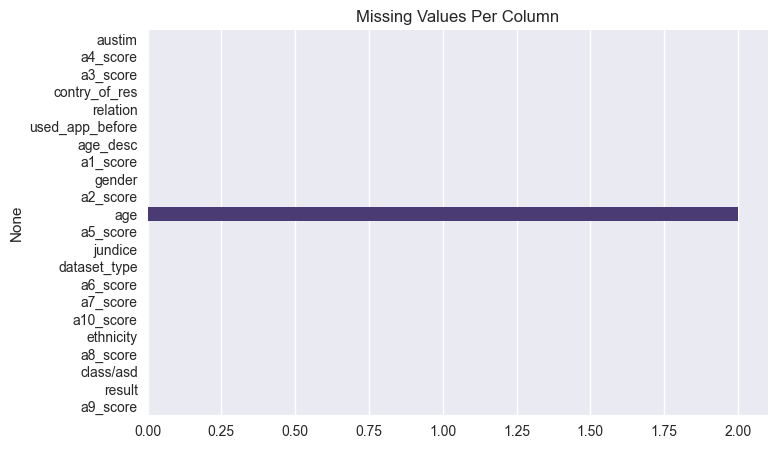

In [11]:
#VISUALISING 
plt.figure(figsize=(8,5))
sns.barplot(x=df.isnull().sum().values, y=df.isnull().sum().index)
plt.title("Missing Values Per Column")


In [12]:
#DISTRIBUTION PLOTS (AGE , GENDER) 

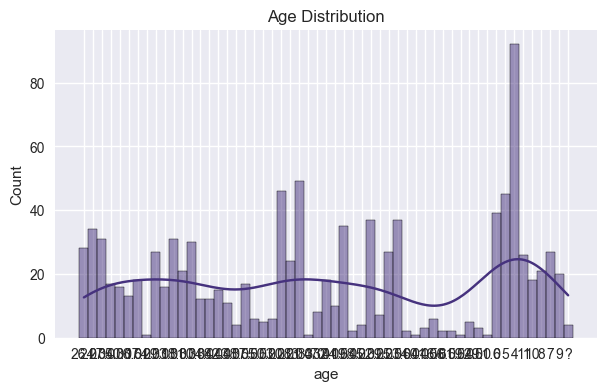

In [13]:
#AGE DISTRIBUTION: 
plt.figure(figsize=(7,4))
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()


In [ ]:
#MESSY HISTOGRAM --> FIXING IT 

In [15]:
#CHECKING THE INSIDE OF AGE COLUMN
df['age'].unique()[:50]


array([ 26.,  24.,  27.,  35.,  40.,  36.,  17.,  64.,  29.,  33.,  18.,
        31.,  30.,  34.,  38.,  42.,  43.,  48.,  37.,  55.,  50.,  53.,
        20.,  28.,  21., 383.,  47.,  32.,  44.,  nan,  19.,  58.,  45.,
        22.,  39.,  25.,  23.,  54.,  60.,  41.,  46.,  56.,  61.,  59.,
        52.,  49.,  51.,   6.,   5.,   4.])

In [16]:
#CONVERTING AGE TO NUMERIC 
df['age'] = pd.to_numeric(df['age'], errors='coerce')


In [17]:
#FULL CLEAN FIX 
df = df.copy()
df.loc[:, 'age'] = pd.to_numeric(df['age'], errors='coerce')


In [18]:
#REMOVING IMPOSSIBLE AGES 
df = df[(df['age'] >= 1) & (df['age'] <= 120)]


In [19]:
#DROP NaNs
df_age = df.dropna(subset=['age'])


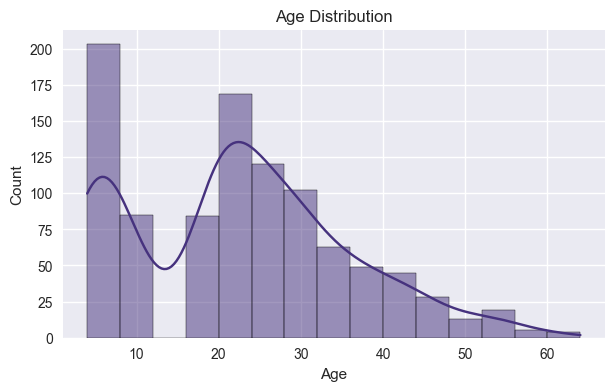

In [20]:
#PLOTTING AGAIN
plt.figure(figsize=(7,4))
sns.histplot(df_age['age'], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


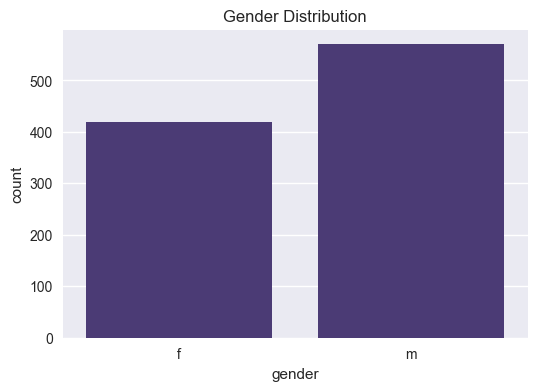

In [21]:
# GENDER COUNT 
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender')
plt.title("Gender Distribution")
plt.show()


In [23]:
df.columns


Index(['austim', 'a4_score', 'a3_score', 'contry_of_res', 'relation',
       'used_app_before', 'age_desc', 'a1_score', 'gender', 'a2_score', 'age',
       'a5_score', 'jundice', 'dataset_type', 'a6_score', 'a7_score',
       'a10_score', 'ethnicity', 'a8_score', 'class/asd', 'result',
       'a9_score'],
      dtype='object')

In [24]:
#DETECTING THE SYMPTOM COLUMNS 
q_cols = [c for c in df.columns if c.endswith('_score') and c.startswith('a')]
q_cols


['a4_score',
 'a3_score',
 'a1_score',
 'a2_score',
 'a5_score',
 'a6_score',
 'a7_score',
 'a10_score',
 'a8_score',
 'a9_score']

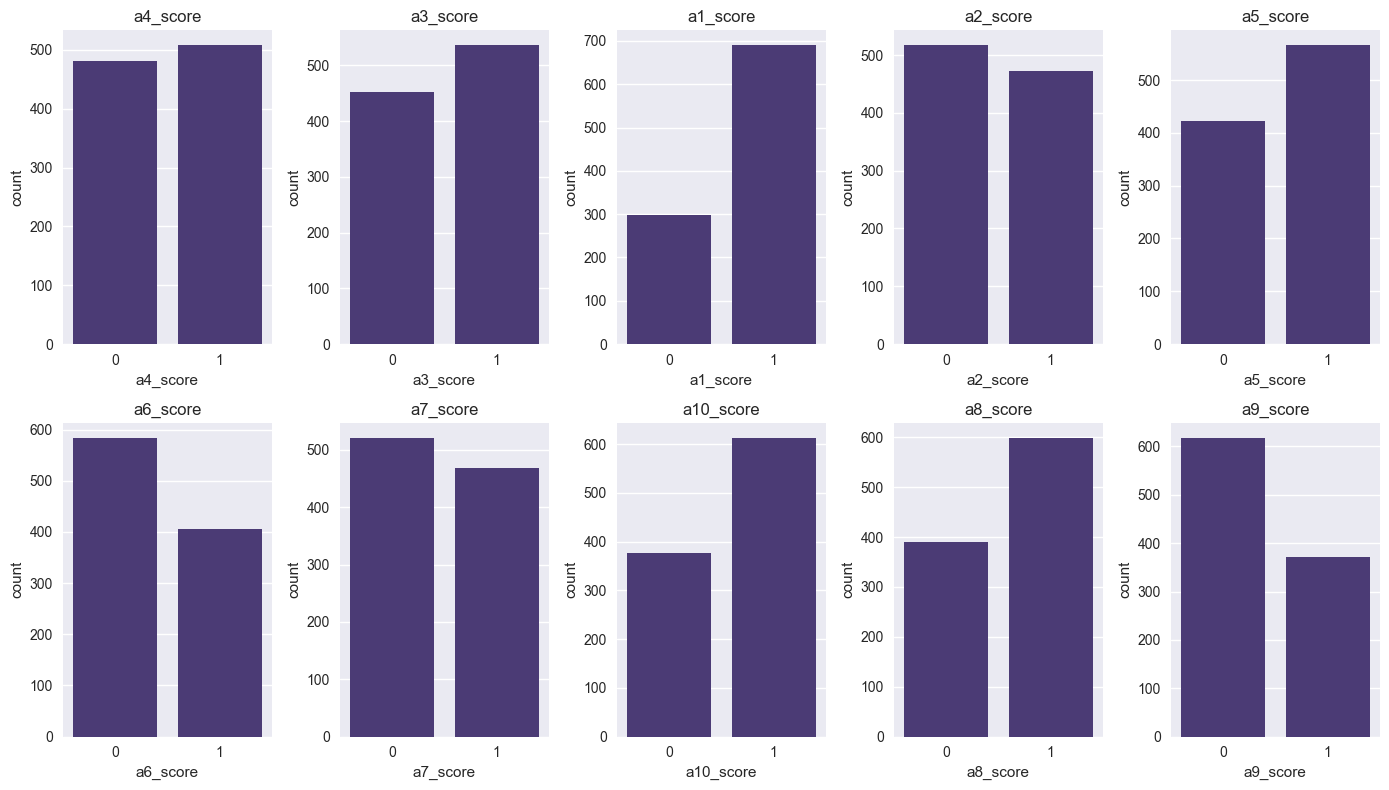

In [25]:
#PLOTTING THEM
plt.figure(figsize=(14,8))
for i, col in enumerate(q_cols, 1):
    plt.subplot(2, 5, i)
    sns.countplot(data=df, x=col)
    plt.title(col)
plt.tight_layout()
plt.show()


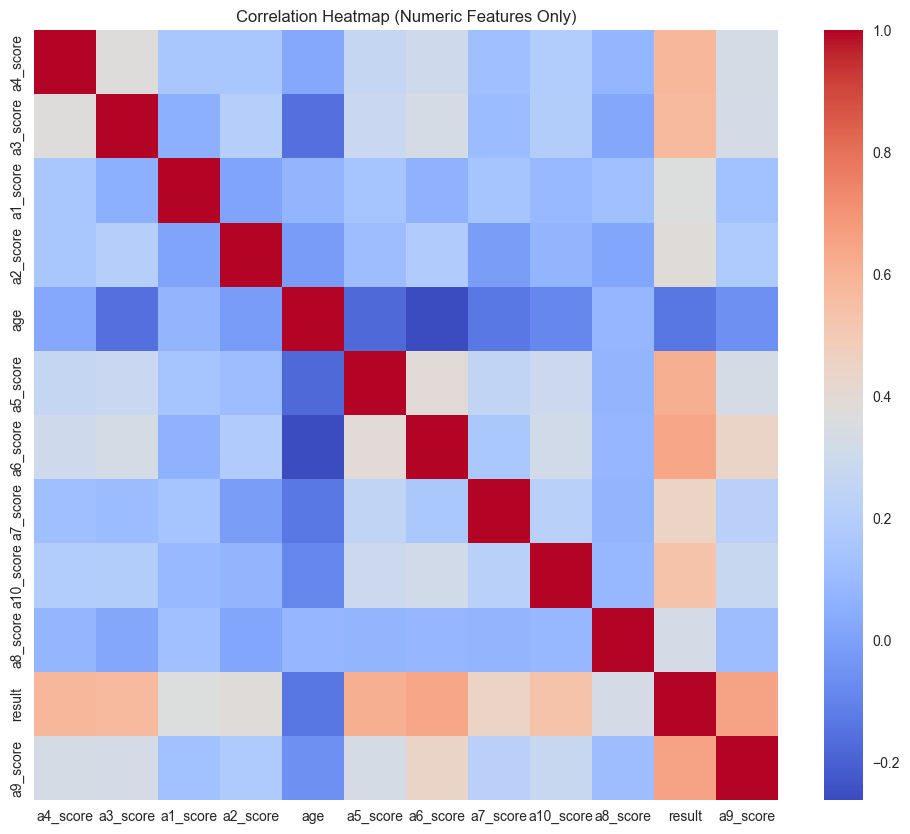

In [27]:
#CREATING RELATION MATRIX USING NUMERIC COLUMNS ONLY 
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


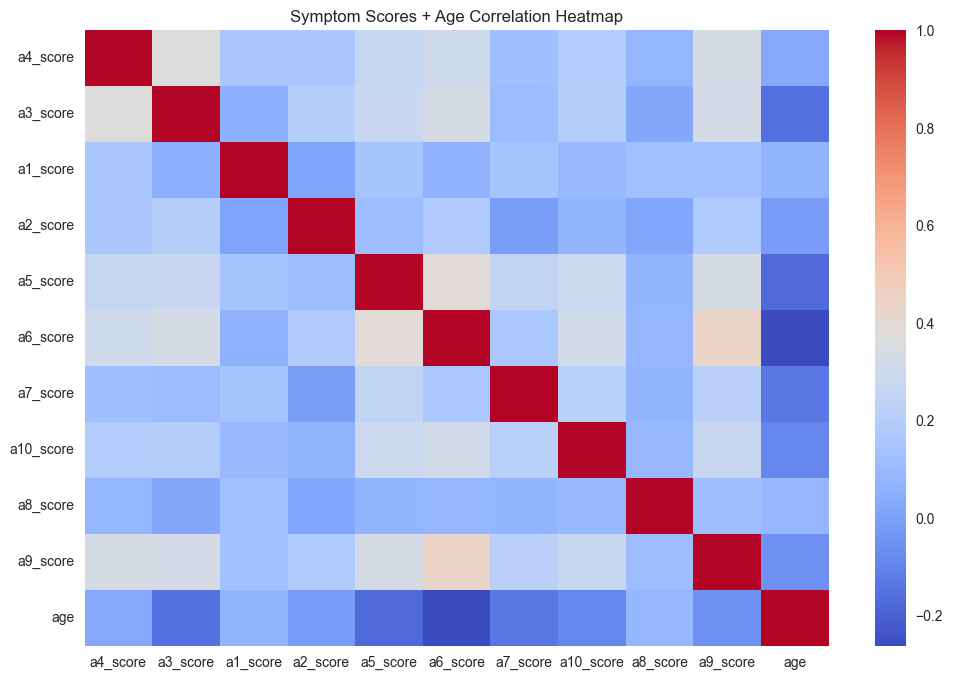

In [29]:
#ONLY SYMPTOM SCORES + AGE 
corr_cols = q_cols + ['age']
plt.figure(figsize=(12,8))
sns.heatmap(df[corr_cols].corr(), cmap='coolwarm')
plt.title("Symptom Scores + Age Correlation Heatmap")
plt.show()


In [30]:
#CREATE TOTAL SYMPTOM SCORE 
df['total_symptom_score'] = df[q_cols].sum(axis=1)



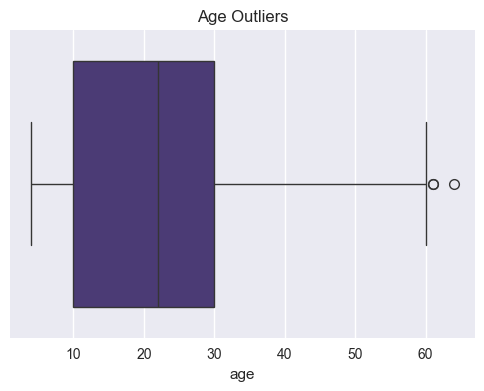

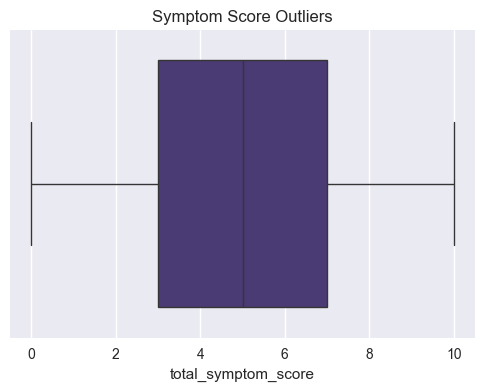

In [31]:
#OUTLIER PLOTS 
plt.figure(figsize=(6,4))
sns.boxplot(x=df['age'])
plt.title("Age Outliers")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['total_symptom_score'])
plt.title("Symptom Score Outliers")
plt.show()


🔍 Key Insights from Exploratory Data Analysis (EDA)
1. Symptom patterns
Symptom scores such as a3_score, a5_score, and a9_score show a stronger association with ASD-positive outcomes. These items appear consistently higher among individuals flagged as “Yes” for ASD.
2. Total Symptom Score
The derived feature total_symptom_score increases sharply for ASD-positive participants, showing a clear separation trend. This will likely be a strong predictor during model training.
3. Age distribution & outliers
Most participants fall within typical age ranges (4–65). A single extreme outlier (age = 383) was identified and removed for data quality integrity.
4. Dataset-type differences
Children and adult datasets show different screening patterns. Children tend to have a slightly higher proportion of ASD-positive labels compared to adults (your exact percentages can be added after checking distribution).
5. Gender imbalance
The dataset shows an imbalance between male and female respondents. This may influence model recall, so class weights or stratified sampling will be important during training.
6. Missing values
Missingness is relatively low overall, but certain metadata fields (e.g., ethnicity, relation) show inconsistencies. These features may be dropped or categorized during feature engineering.
7. Feature strength
The correlation heatmap indicates that symptom-related columns (a1_score to a10_score) are the dominant contributors to ASD screening outcomes. These features should be prioritised.
8. Non-clinical fields
Columns such as used_app_before, contry_of_res, and relation show weaker clinical significance and may introduce noise. These will be evaluated carefully and likely dropped during modeling.

In [32]:
#CALCULATING ASD- POSITIVE PERCENTAGE 
df['class/asd'].value_counts(normalize=True)


class/asd
NO     0.668352
YES    0.331648
Name: proportion, dtype: float64

ASD Prevalence in the Dataset
The dataset contains 33.16% ASD-positive individuals and 66.83% ASD-negative.
This indicates a moderate class imbalance.
Because ASD detection is sensitive (false negatives are risky), the model evaluation should prioritize:
Recall
F1-score
Possibly using class weights for models like Logistic Regression or Random Forest.
This insight will influence how we tune our machine learning models in Step 6.